## ***SI 311 Homework #8: 2017 Combine Analysis: WA40 vs. Draft Position***

Data from: https://www.pro-football-reference.com/draft/2017-combine.htm

APA Citation: 2017 NFL combine results. Pro. (n.d.). Retrieved November 4, 2022, from https://www.pro-football-reference.com/draft/2017-combine.htm 

Formulas from SI 311, University of Michigan Fall '22

*Code Written by Brandon Huggard*

https://www.linkedin.com/in/brandon-huggard-5957a0192/

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
combine = pd.read_csv("combine.csv")

In [47]:
combine.head(3)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team Drafted,Round,Round Clean,Pick,Pick Clean,Year
0,Dante Pettis,WR,Washington,College Stats,6-0,186,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers,2nd,2.0,44th pick,44.0,2018.0
1,Kemoko Turay,EDGE,Rutgers,College Stats,6-5,253,4.65,NaN,NaN,NaN,NaN,NaN,Indianapolis Colts,2nd,2.0,52nd pick,52.0,2018.0
2,Josh Adams,RB,Notre Dame,College Stats,6-2,213,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
rbs = combine[combine['Pos'] == 'RB']

In [49]:
rbs = rbs.drop(columns = ['Pick', 'Round'])

In [50]:
rbs = rbs.dropna(subset = ['Round Clean'])

In [51]:
rbs[rbs['40yd'].isnull()]

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team Drafted,Round Clean,Pick Clean,Year
158,Kerryon Johnson,RB,Auburn,College Stats,5-11,213,NaN,40.0,11.0,126.0,7.07,4.29,Detroit Lions,2.0,43.0,2018.0
169,John Kelly,RB,Tennessee,College Stats,5-10,216,NaN,35.0,15.0,120.0,7.13,4.51,Los Angeles Rams,6.0,176.0,2018.0
321,Jordan Wilkins,RB,Mississippi,College Stats,6-1,216,NaN,36.0,16.0,117.0,NaN,4.27,Indianapolis Colts,5.0,169.0,2018.0


In [52]:
rbs.at[158,'40yd']='4.52'
rbs.at[169,'40yd']='4.65'
rbs.at[321,'40yd']='4.53'

In [53]:
rbs['WA40'] = (rbs['Wt'] * 200) / (rbs['40yd']**4)

In [54]:
rbs.head(3)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team Drafted,Round Clean,Pick Clean,Year,WA40
20,Kalen Ballage,RB,Arizona State,College Stats,6-1,228,4.46,33.5,15.0,122.0,6.91,4.35,Miami Dolphins,4.0,131.0,2018.0,115.245880
21,Saquon Barkley,RB,Penn State,College Stats,6-0,233,4.40,41.0,29.0,NaN,NaN,4.24,New York Giants,1.0,2.0,2018.0,124.329793
54,Nick Chubb,RB,Georgia,College Stats,5-11,227,4.52,38.5,29.0,128.0,7.09,4.25,Cleveland Browns,2.0,35.0,2018.0,108.768243


In [63]:
rbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 20 to 321
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        16 non-null     object 
 1   Pos           16 non-null     object 
 2   School        16 non-null     object 
 3   College       15 non-null     object 
 4   Ht            16 non-null     object 
 5   Wt            16 non-null     int64  
 6   40yd          16 non-null     float64
 7   Vertical      15 non-null     float64
 8   Bench         14 non-null     float64
 9   Broad Jump    12 non-null     float64
 10  3Cone         8 non-null      float64
 11  Shuttle       12 non-null     float64
 12  Team Drafted  16 non-null     object 
 13  Round Clean   16 non-null     float64
 14  Pick Clean    16 non-null     float64
 15  Year          16 non-null     float64
 16  WA40          16 non-null     float64
dtypes: float64(10), int64(1), object(6)
memory usage: 2.8+ KB


In [65]:
rbs_WA = rbs.sort_values('WA40', ascending = False)
rbs_WA.head(5)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team Drafted,Round Clean,Pick Clean,Year,WA40
21,Saquon Barkley,RB,Penn State,College Stats,6-0,233,4.40,41.0,29.0,NaN,NaN,4.24,New York Giants,1.0,2.0,2018.0,124.329793
20,Kalen Ballage,RB,Arizona State,College Stats,6-1,228,4.46,33.5,15.0,122.0,6.91,4.35,Miami Dolphins,4.0,131.0,2018.0,115.245880
227,Rashaad Penny,RB,San Diego State,College Stats,5-11,220,4.46,32.5,13.0,120.0,NaN,NaN,Seattle Seahawks,1.0,27.0,2018.0,111.202165
115,Derrius Guice,RB,LSU,College Stats,5-10,224,4.49,31.5,15.0,NaN,NaN,NaN,Washington Redskins,2.0,59.0,2018.0,110.228183
257,Bo Scarbrough,RB,Alabama,College Stats,6-1,228,4.52,40.0,14.0,129.0,NaN,4.34,Dallas Cowboys,7.0,236.0,2018.0,109.247398


In [66]:
rbs_draft = rbs.sort_values('Pick Clean')
rbs_draft.head(5)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team Drafted,Round Clean,Pick Clean,Year,WA40
21,Saquon Barkley,RB,Penn State,College Stats,6-0,233,4.40,41.0,29.0,NaN,NaN,4.24,New York Giants,1.0,2.0,2018.0,124.329793
227,Rashaad Penny,RB,San Diego State,College Stats,5-11,220,4.46,32.5,13.0,120.0,NaN,NaN,Seattle Seahawks,1.0,27.0,2018.0,111.202165
201,Sony Michel,RB,Georgia,College Stats,5-11,214,4.54,NaN,22.0,NaN,NaN,4.21,New England Patriots,1.0,31.0,2018.0,100.744271
54,Nick Chubb,RB,Georgia,College Stats,5-11,227,4.52,38.5,29.0,128.0,7.09,4.25,Cleveland Browns,2.0,35.0,2018.0,108.768243
163,Ronald Jones,RB,USC,College Stats,5-11,205,4.65,36.5,NaN,NaN,NaN,NaN,Tampa Bay Buccaneers,2.0,38.0,2018.0,87.694437


In [57]:
rbs["WA40"].corr(rbs["Pick Clean"])

-0.30973272082732534

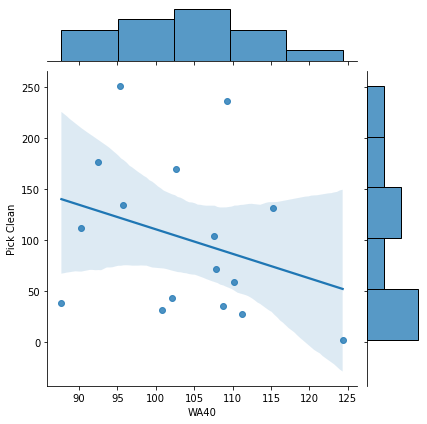

In [58]:
g = sns.JointGrid(data=rbs,x='WA40',y='Pick Clean')
g = g.plot(sns.regplot, sns.histplot)